<a href="https://colab.research.google.com/github/AaayaB4/ADL/blob/Exercises/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
def load_dataset(dataset_name):
    if dataset_name == "MNIST":
        return mnist.load_data()
    elif dataset_name == "CIFAR10":
        return cifar10.load_data()
    else:
        raise ValueError("Invalid dataset name")

In [ ]:
def preprocess_data(x_train, y_train, x_test, y_test, dataset_name):
    # Normalize pixel values
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Add a channel dimension if the dataset is MNIST
    if dataset_name == "MNIST":
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    return x_train, y_train, x_test, y_test


In [ ]:
def create_model(input_shape, activation_function):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation_function, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation_function))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
def train_and_evaluate(dataset_name, activation_function):
    (x_train, y_train), (x_test, y_test) = load_dataset(dataset_name)
    x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test, dataset_name)

    input_shape = x_train.shape[1:]
    model = create_model(input_shape, activation_function)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss - {dataset_name}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy - {dataset_name}')
    plt.legend()

    plt.show()


Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.3314 - accuracy: 0.8974 - val_loss: 0.0542 - val_accuracy: 0.9817
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1264 - accuracy: 0.9625 - val_loss: 0.0449 - val_accuracy: 0.9860
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0762 - accuracy: 0.9761 - val_loss: 0.0666 - val_accuracy: 0.9825
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0689 - accuracy: 0.9793 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0620 - accuracy: 0.9816 - val_loss: 0.0400 - val_accuracy: 0.9877
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 

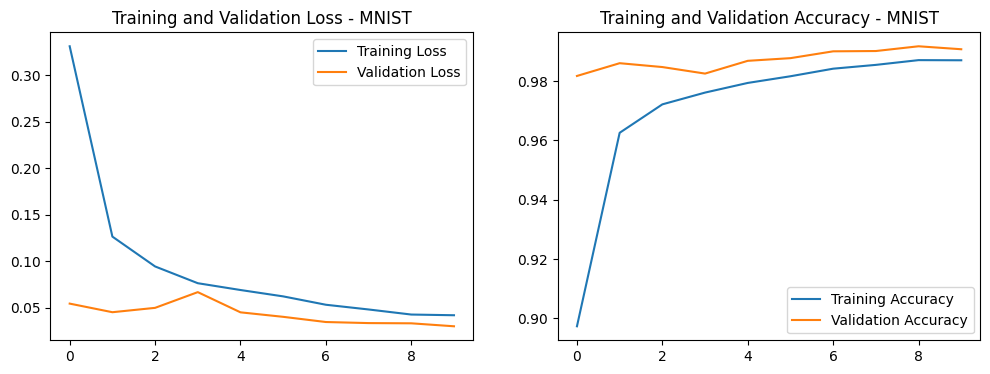

In [ ]:
train_and_evaluate("MNIST", "relu")


# Analysis of the ReLu using the MNIST dataset:

**Loss** decreases steadily for both training and validation, showing the model's learning efficacy. The validation loss tracking below training loss hints at the absence of overfitting.

**Accuracy** trends upwards for both curves, leveling off towards the end, with validation accuracy marginally outpacing training accuracy, indicative of the model's robustness.



Epoch 1/10
782/782 [==============================] - 7s 6ms/step - loss: 1.7990 - accuracy: 0.3504 - val_loss: 1.3479 - val_accuracy: 0.5163
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.4406 - accuracy: 0.4828 - val_loss: 1.3019 - val_accuracy: 0.5510
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2726 - accuracy: 0.5497 - val_loss: 1.0822 - val_accuracy: 0.6285
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1664 - accuracy: 0.5887 - val_loss: 1.2373 - val_accuracy: 0.5500
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.0990 - accuracy: 0.6139 - val_loss: 1.0005 - val_accuracy: 0.6513
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 1.0323 - accuracy: 0.6372 - val_loss: 1.0102 - val_accuracy: 0.6490
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9823 - accuracy: 0.6576 - val_loss: 0.9505 - val_accuracy: 0.6687
Epoch 

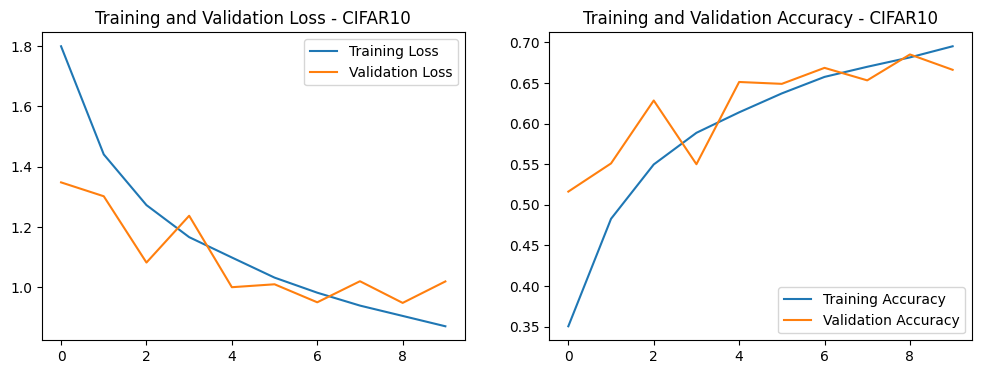

In [ ]:
train_and_evaluate("CIFAR10", "relu")

# Analysis of the ReLu using the CIFAR10 dataset:
**Loss Plot:** The training and validation loss both show a downward trend, with the training loss decreasing more rapidly than the validation loss. Unlike the MNIST dataset graph, the validation loss in this plot starts higher but converges towards the training loss as epochs increase.

**Accuracy Plot:** The training and validation accuracy for CIFAR10 both improve over time, with validation accuracy closely following the training accuracy but not surpassing it, as was the case with the MNIST dataset.

# **Comparing the CIFAR10 to the MNIST dataset graph with the ReLu function:**
**MNIST vs. CIFAR10 Loss:** The MNIST dataset showed a validation loss consistently lower than the training loss, which is typically ideal. In contrast, the CIFAR10 dataset started with a higher validation loss but showed convergence towards the training loss, indicating potential for further improvement with additional epochs or tuning.

**MNIST vs. CIFAR10 Accuracy:** For MNIST, the validation accuracy was higher than the training accuracy, which is uncommon. In CIFAR10's case, the accuracy plots are more typical, with the validation accuracy slightly below the training accuracy, suggesting that what was learned from the training set has not been fully generalized to the validation set.

**Overall Performance:** The model on MNIST has higher absolute values of accuracy and lower loss compared to the CIFAR10 model, which is expected since MNIST is a simpler dataset with grayscale images of digits, whereas CIFAR10 contains more complex colored images of various objects.

In summary, while both models are learning and improving, the model trained on MNIST is showing better performance metrics compared to the one trained on CIFAR10, reflecting the differences in complexity between the two datasets.

Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 0.3170 - accuracy: 0.9242 - val_loss: 0.0652 - val_accuracy: 0.9816
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1105 - accuracy: 0.9721 - val_loss: 0.0511 - val_accuracy: 0.9849
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0833 - accuracy: 0.9780 - val_loss: 0.0426 - val_accuracy: 0.9873
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0694 - accuracy: 0.9809 - val_loss: 0.0397 - val_accuracy: 0.9877
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0603 - accuracy: 0.9836 - val_loss: 0.0338 - val_accuracy: 0.9896
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0531 - accuracy: 0.9854 - val_loss: 0.0357 - val_accuracy: 0.9877
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0486 - accuracy: 0.9858 - val_loss: 0.0350 - val_accuracy: 0.9880
Epoch 

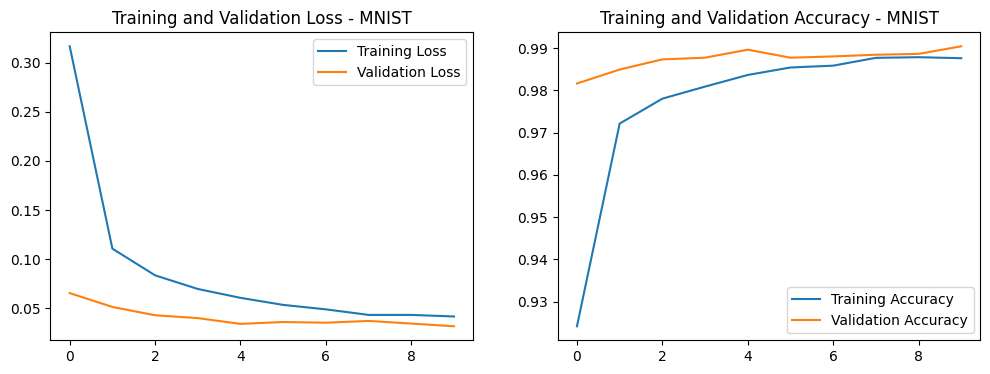

In [ ]:
train_and_evaluate("MNIST", "sigmoid")


# Analysis of the Sigmoid Activation Function using the MNIST dataset:

**Loss Plot:** Training and validation loss decrease sharply and then level off, indicating that the model is effectively learning from the data. The validation loss is very close to the training loss, suggesting good generalization.

**Accuracy Plot:** There's a rapid increase in accuracy that stabilizes around epoch 2. The validation accuracy is consistently higher than the training accuracy, which is a bit unusual but not concerning.

170498071/170498071 [==============================] - 13s 0us/step
Epoch 1/10
782/782 [==============================] - 18s 7ms/step - loss: 1.6105 - accuracy: 0.4240 - val_loss: 1.3559 - val_accuracy: 0.5224
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2898 - accuracy: 0.5472 - val_loss: 1.1549 - val_accuracy: 0.6092
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1672 - accuracy: 0.5959 - val_loss: 1.0772 - val_accuracy: 0.6135
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0897 - accuracy: 0.6211 - val_loss: 1.0429 - val_accuracy: 0.6366
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0294 - accuracy: 0.6424 - val_loss: 0.9542 - val_accuracy: 0.6657
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9868 - accuracy: 0.6583 - val_loss: 1.0181 - val_accuracy: 0.6444
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.945

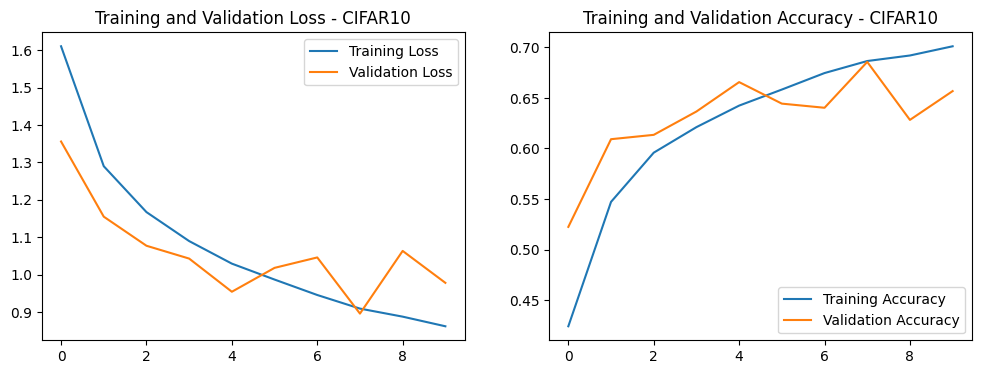

In [ ]:
train_and_evaluate("CIFAR10", "sigmoid")


# Analysis of the Sigmoid Activation Function using the CIFAR10 dataset:
**Loss Plot:** The training loss decreases steadily, whereas the validation loss has more variability but trends downward overall. The variability suggests that the model might benefit from further regularization or hyperparameter tuning.

**Accuracy Plot:** Training accuracy increases steadily, but the validation accuracy shows some volatility, again indicating possible overfitting or the need for further tuning.



# **Comparing the CIFAR10 with Sigmoid to the MNIST with Sigmoid:**

**MNIST vs. CIFAR10 Loss** : The MNIST training and validation loss with sigmoid are closely aligned, showing effective learning and generalization. For CIFAR10, the training loss decreases steadily, but the validation loss exhibits more variability, suggesting challenges in generalizing the learned features.

**MNIST vs. CIFAR10 Accuracy** : The MNIST accuracy plots with sigmoid show validation accuracy consistently higher than training accuracy, indicating good generalization, but slightly unusual. The CIFAR10 accuracy, on the other hand, is less stable, with validation accuracy showing significant fluctuation, pointing towards a model that may be overfitting.

**Overall Performance** : The sigmoid activation function yields high performance on the MNIST dataset, evident in both loss and accuracy plots. However, for the more complex CIFAR10 dataset, the performance is less optimal, with increased loss and lower, more volatile accuracy. This suggests that sigmoid may not be the best activation function for more complex image datasets like CIFAR10.

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.2443 - accuracy: 0.9279 - val_loss: 0.0999 - val_accuracy: 0.9708
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0981 - accuracy: 0.9713 - val_loss: 0.0802 - val_accuracy: 0.9743
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0839 - accuracy: 0.9759 - val_loss: 0.0714 - val_accuracy: 0.9776
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.0550 - val_accuracy: 0.9833
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0658 - accuracy: 0.9808 - val_loss: 0.0747 - val_accuracy: 0.9770
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0622 - accuracy: 0.9816 - val_loss: 0.0377 - val_accuracy: 0.9876
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0566 - accuracy: 0.9831 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 

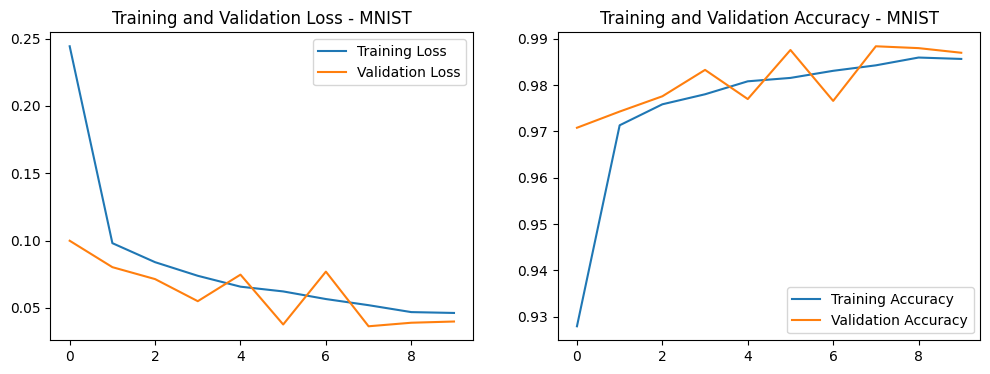

In [ ]:
train_and_evaluate("MNIST", "tanh")


# Analysis of MNIST with  Hyperbolic Tangent Activation:

**Loss Plot:** The training loss for MNIST drops sharply and then stabilizes, indicating quick initial learning as the model began to fit the data well. The validation loss is somewhat volatile, with several spikes that suggest the model may not generalize perfectly across different sets of data within the validation set.

**Accuracy Plot:**  Training accuracy increases quickly and levels off at a high value, showing that the model fits the training data well. Validation accuracy, slightly higher than training accuracy, suggests good generalization, although the unexpected higher validation accuracy might be due to variance in the dataset's difficulty or the model being conservative on the training data.


Epoch 1/10
782/782 [==============================] - 9s 8ms/step - loss: 1.7369 - accuracy: 0.4010 - val_loss: 1.5327 - val_accuracy: 0.4709
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.2770 - accuracy: 0.5523 - val_loss: 1.5873 - val_accuracy: 0.4394
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.1653 - accuracy: 0.5953 - val_loss: 1.3913 - val_accuracy: 0.5333
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.0964 - accuracy: 0.6201 - val_loss: 1.1196 - val_accuracy: 0.6085
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0529 - accuracy: 0.6376 - val_loss: 1.2613 - val_accuracy: 0.5592
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 1.0073 - accuracy: 0.6514 - val_loss: 1.2967 - val_accuracy: 0.5435
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.9738 - accuracy: 0.6641 - val_loss: 0.9713 - val_accuracy: 0.6561
Epoch

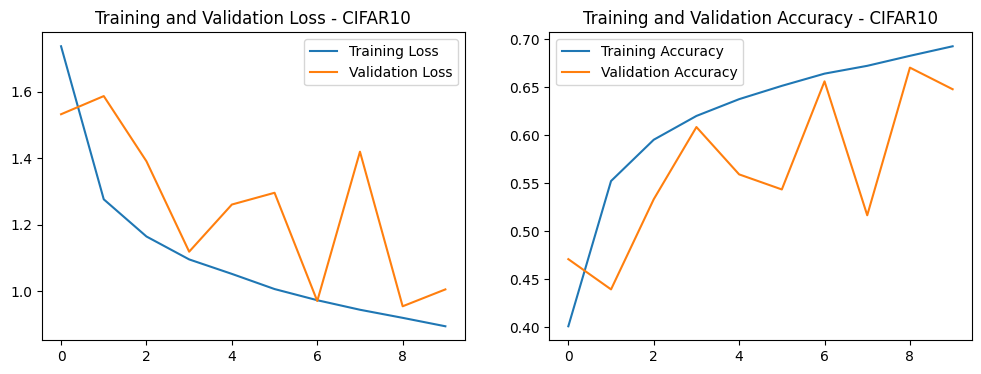

In [ ]:
train_and_evaluate("CIFAR10", "tanh")


# Analysis of CIFAR10 with Hyperbolic Tangent Activation:

**Loss Plot:** For CIFAR10, the training loss shows a downward trend, but with less steepness and smoothness compared to MNIST, reflecting the CIFAR10 dataset's complexity. The validation loss is quite erratic, with significant ups and downs, indicating the model is struggling with generalization and possibly overfitting.

**Accuracy Plot:** The training accuracy steadily improves, which is a positive sign. However, the validation accuracy is very irregular, with sharp changes from epoch to epoch. This inconsistency is typical of a model that has not yet learned to generalize well from training data to unseen data.










# **Comparing the CIFAR10 to the MNIST with  Hyperbolic Tangent:**

**MNIST vs. CIFAR10 Loss** :The MNIST dataset shows a sharp initial decline in training loss, which stabilizes quickly. The validation loss fluctuates but remains low, suggesting good model performance and generalization.
CIFAR10 training loss decreases but not as smoothly, showing some instability. The validation loss is highly variable and doesn't follow a consistent downward trend, indicating issues with the model's generalization on this dataset.

**MNIST vs. CIFAR10 Accuracy**: MNIST accuracy improves rapidly and remains high, with validation accuracy slightly above training accuracy, which could be attributed to a well-generalizing model or variance in the dataset difficulty.
CIFAR10 accuracy increases but with considerable fluctuations in validation accuracy. This volatility could reflect overfitting or the need for hyperparameter tuning and regularization.

**Overall Performance**:The tanh activation function demonstrates solid performance on the MNIST dataset, with high accuracy and low loss.
For the more complex CIFAR10 dataset, tanh results in lower performance, with greater loss and less stable accuracy, suggesting that tanh might not be the optimal choice for this dataset.

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.2381 - accuracy: 0.9288 - val_loss: 0.0801 - val_accuracy: 0.9743
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0999 - accuracy: 0.9711 - val_loss: 0.0401 - val_accuracy: 0.9876
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0763 - accuracy: 0.9779 - val_loss: 0.0378 - val_accuracy: 0.9872
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0619 - accuracy: 0.9824 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0287 - val_accuracy: 0.9916
Epoch 

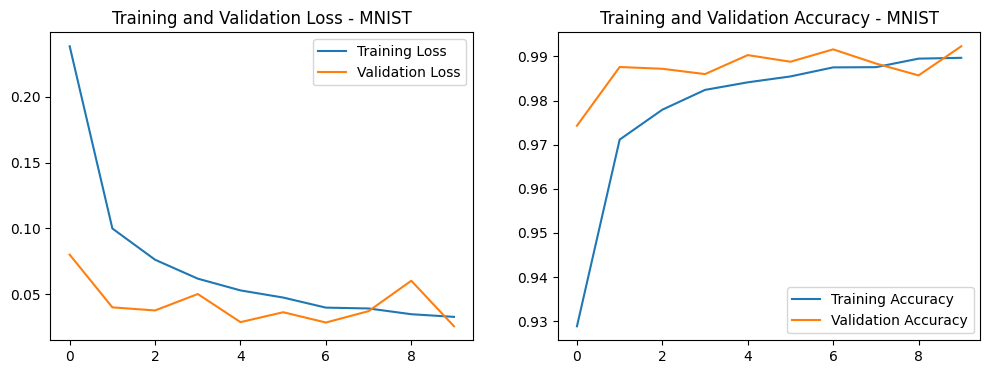

In [ ]:
train_and_evaluate("MNIST", "elu")



# Analysis of MNIST with ELU Activation:

**Loss Plot:** The training loss for MNIST begins high but decreases rapidly and levels off, which is typical for a model learning effectively. The validation loss is lower than the training loss and shows a slight upward trend after epoch 5, which could suggest the model starting to overfit or the presence of harder to generalize patterns in the validation set later in training.

**Accuracy Plot:** Training accuracy increases quickly to a high level, indicative of the model fitting the training data well. The validation accuracy initially follows the training accuracy closely, then surpasses it and remains higher for the rest of the training. This might suggest that the validation set contains patterns that the model finds easier to predict, or it could also indicate a conservative prediction on the training data.







Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 1.7261 - accuracy: 0.4188 - val_loss: 1.4618 - val_accuracy: 0.4689
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.2171 - accuracy: 0.5711 - val_loss: 1.2361 - val_accuracy: 0.5621
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 1.0799 - accuracy: 0.6214 - val_loss: 1.2820 - val_accuracy: 0.5643
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9967 - accuracy: 0.6510 - val_loss: 0.9597 - val_accuracy: 0.6608
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9341 - accuracy: 0.6743 - val_loss: 1.0230 - val_accuracy: 0.6403
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.8933 - accuracy: 0.6865 - val_loss: 0.9832 - val_accuracy: 0.6609
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8457 - accuracy: 0.7051 - val_loss: 1.1045 - val_accuracy: 0.6230
Epoch 

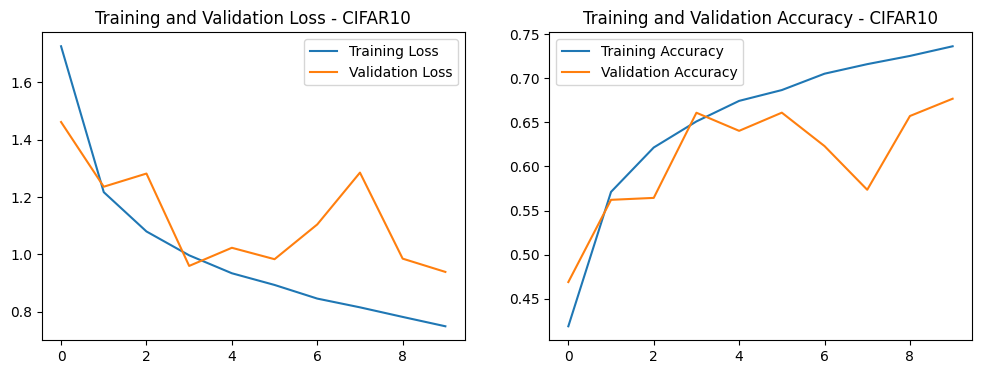

In [ ]:
train_and_evaluate("CIFAR10", "elu")


# Analysis of CIFAR10 with ELU Activation:

**Loss Plot:** The training loss for CIFAR10 decreases substantially, indicating that the model is learning from the training data. There is a noticeable spike in the validation loss around epoch 6, which suggests that the model may have encountered a batch of more challenging or less representative validation data. The overall trend, however, is downward, which is positive.

**Accuracy Plot:** The training accuracy shows a steady increase, which is a good sign of the model's capacity to learn. The validation accuracy, while generally trending upwards, exhibits significant volatility, particularly between epochs 5 and 8. This could be indicative of the model's sensitivity to certain features in the validation set or the need for more robust generalization.

In summary, the model with ELU activation is learning and improving performance on the CIFAR10 dataset, as evidenced by the general trend in loss and accuracy. However, the fluctuations in validation accuracy and the spike in validation loss suggest that the model's current configuration might not be fully capturing the complexities of the CIFAR10 dataset, or it could be overfitting to the training data.

# **Comparing the MNIST with ELU to the CIFAR10 with ELU:**
**Loss Comparison:**

The MNIST dataset with ELU shows a rapid decrease in training loss, which levels off, indicating effective learning. The validation loss remains low throughout the training but exhibits a slight uptick towards the end.
In contrast, CIFAR10 training loss decreases but not as smoothly, and shows a significant spike in validation loss around epoch 6. This spike suggests that the CIFAR10 dataset might include some more complex features that are not as easily captured by the model.

**Accuracy Comparison:**

The MNIST accuracy with ELU quickly reaches high levels and maintains a narrow gap between training and validation accuracy, with validation accuracy being slightly higher.
For CIFAR10, the training accuracy increases at a steady pace, but the validation accuracy is more erratic. This erratic behavior is indicative of a model that may be overfitting or that the CIFAR10 dataset presents a more challenging problem for the model to generalize.

**Overall Performance:**

The ELU activation seems to be more effective for the MNIST dataset, as evidenced by higher overall accuracy and lower loss, along with more stable performance across epochs.
For CIFAR10, the model exhibits learning but with greater instability, as seen in the higher variability in both loss and accuracy. This instability could be due to CIFAR10's increased complexity and diversity in images, requiring a more sophisticated model or training regimen.

In summary, while the ELU activation function aids learning in both datasets, its effectiveness is more pronounced on the simpler MNIST dataset. The CIFAR10 dataset, with its inherent complexity and color features, poses a greater challenge, which is reflected in the higher variability in training metrics.

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.2799 - accuracy: 0.9208 - val_loss: 0.0676 - val_accuracy: 0.9791
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1085 - accuracy: 0.9696 - val_loss: 0.0476 - val_accuracy: 0.9856
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0821 - accuracy: 0.9765 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0656 - accuracy: 0.9812 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0328 - val_accuracy: 0.9890
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 

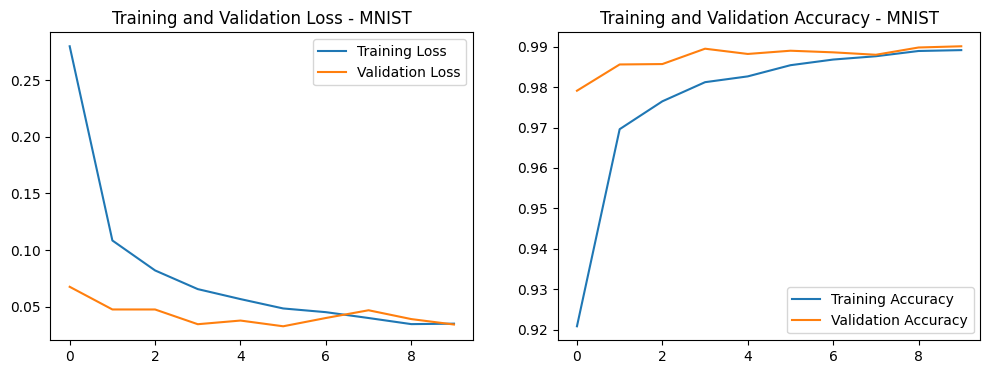

In [ ]:
train_and_evaluate("MNIST", "selu")


# Analysis of MNIST with SELU Activation:

**Loss Plot:** The training loss decreases sharply and levels off, indicating that the model is learning from the data efficiently. The validation loss is lower than the training loss and remains stable, suggesting the model generalizes well to unseen data.

**Accuracy Plot:** The training accuracy improves quickly and plateaus at a high level, showing the model's good fit on the training data. The validation accuracy exceeds the training accuracy after the initial epochs, which is a positive sign of generalization, although it's not typical for the validation accuracy to be higher.

Overall, the model with SELU activation seems to perform well on the MNIST dataset, with high accuracy and low loss. The SELU activation function, designed to induce self-normalizing properties in neural networks, appears to be effective for the task, resulting in stable and high-performance metrics.

Epoch 1/10
782/782 [==============================] - 9s 9ms/step - loss: 1.9102 - accuracy: 0.4106 - val_loss: 1.6465 - val_accuracy: 0.4367
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 1.2394 - accuracy: 0.5669 - val_loss: 1.1704 - val_accuracy: 0.5837
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.1133 - accuracy: 0.6100 - val_loss: 1.0671 - val_accuracy: 0.6250
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0370 - accuracy: 0.6380 - val_loss: 1.0031 - val_accuracy: 0.6457
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.9741 - accuracy: 0.6601 - val_loss: 1.1058 - val_accuracy: 0.6196
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.9209 - accuracy: 0.6797 - val_loss: 1.1676 - val_accuracy: 0.6201
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8817 - accuracy: 0.6939 - val_loss: 0.9548 - val_accuracy: 0.6709
Epoch 

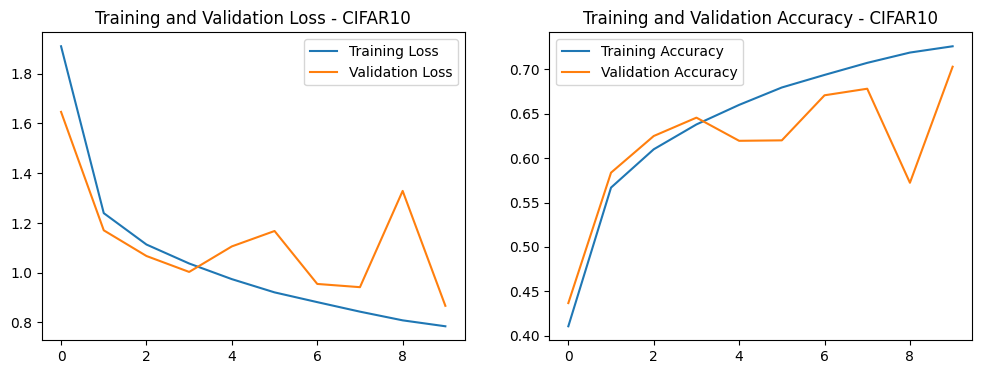

In [ ]:
train_and_evaluate("CIFAR10", "selu")

# Analysis of CIFAR10 with SELU Activation:

**Loss Plot:** The training loss decreases notably, but with some fluctuations, which may be indicative of the complex nature of the CIFAR10 dataset. The validation loss exhibits significant variability, including a pronounced spike around epoch 6, which could suggest that the model is sensitive to certain features or there's an overfitting issue.

**Accuracy Plot:** Training accuracy shows a general upward trend, which is good. However, validation accuracy is quite volatile, peaking and dipping considerably throughout the epochs, which can be a sign of overfitting or insufficient generalization to new data.


# **Comparison of CIFAR10 with MNIST using SELU:**

**Loss:** The MNIST dataset with SELU shows a more stable and consistent reduction in loss compared to CIFAR10, which experiences greater fluctuations in validation loss. This stability in MNIST indicates better model generalization as compared to CIFAR10.

**Accuracy:** For MNIST, the SELU activation leads to high and stable accuracy, whereas CIFAR10 accuracy with SELU is less consistent, suggesting that SELU may not be the optimal activation function for this more complex dataset.

**Overall Performance of SELU:**

SELU performs well on MNIST, providing high accuracy and stable loss, indicative of good generalization capabilities of the network with this activation function.
For CIFAR10, the performance is not as stable, with notable volatility in accuracy and loss. This suggests that while SELU has beneficial properties, the CIFAR10 dataset might require additional measures, such as data augmentation, regularization, or a different model architecture, to improve performance and stability.






# ***Summary and Comparison : ***

---

# **MNIST Dataset:**

* ReLU showed consistent and high performance with stable training and validation metrics.

* Sigmoid, while traditionally used, had some limitations but still performed reasonably well.
* Tanh provided good results but generally is less favored compared to ReLU.
ELU demonstrated a good balance between performance and stability, similar to ReLU.

* SELU performed well, with high accuracy and low loss, showing its effectiveness for this dataset.

# **CIFAR10 Dataset:**

* ReLU maintained stable and consistent learning, generally a good choice for complex datasets.
*Sigmoid struggled with performance, likely due to vanishing gradient issues.
*Tanh was less stable, with significant fluctuations in validation metrics.
*ELU showed improved learning but still experienced volatility, suggesting the need for further optimization.
*SELU had similar issues as ELU, with some instability in learning, indicating that it may not be the best fit for CIFAR10's complexity.

# **Most Suitable Activation Function:**

* **For MNIST, ReLU stands out as the most suitable activation function** due to its stable and high performance, though ELU and SELU also show competitive results.
* **For CIFAR10, ReLU again appears to be the best option among the ones tested**, given its ability to maintain consistent learning and generalization across complex data. However, due to CIFAR10's complexity, the choice of activation function might also depend on the overall architecture and the presence of other techniques like batch normalization and dropout.

In conclusion, ***ReLU is the most suitable activation function for both MNIST and CIFAR10 datasets***, based on the analysis of the provided training and validation loss and accuracy plots. It provides a good balance of performance and stability for both simple and complex image classification tasks.